In [1]:
from tensor import viz_tensor, model
from tensorflow.examples.tutorials.mnist import input_data
from svm import load_mnist, fit, predict, accuracy

ImportError: cannot import name 'viz_svm'

In [2]:
# import data
fashion_mnist = input_data.read_data_sets('../data', one_hot=True)

# shapes of training set
print('Training set (images) shape: {shape}'.format(shape=fashion_mnist.train.images.shape))
print('Training set (labels) shape: {shape}'.format(shape=fashion_mnist.train.labels.shape))

# shapes of test set
print('Test set (images) shape: {shape}'.format(shape=fashion_mnist.test.images.shape))
print('Test set (labels) shape: {shape}'.format(shape=fashion_mnist.test.labels.shape))

Extracting ../data\train-images-idx3-ubyte.gz
Extracting ../data\train-labels-idx1-ubyte.gz
Extracting ../data\t10k-images-idx3-ubyte.gz
Extracting ../data\t10k-labels-idx1-ubyte.gz
Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [3]:
# image labels
labels = {
    0: 't-shirt',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'ankle-boot'
}

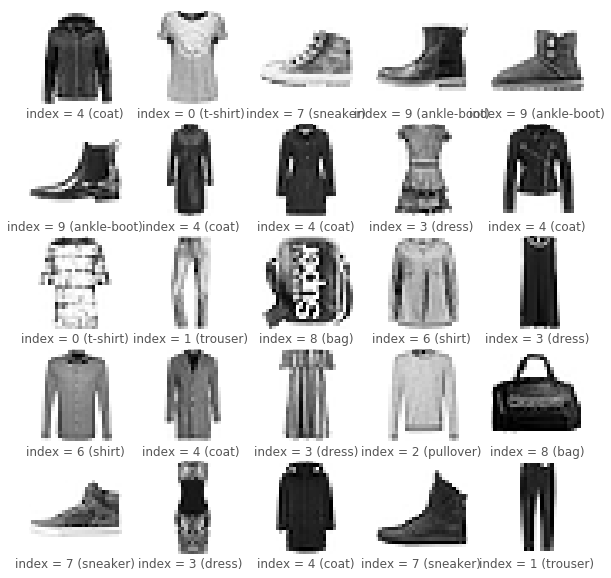

In [4]:
# visualize train sample
viz_tensor(range(25), fashion_mnist, labels)

Cost after epoch 0: 0.5172157744173403
Cost after epoch 1: 0.3773462496984134
Cost after epoch 2: 0.3366556065406424
Cost after epoch 3: 0.31052646565232644
Cost after epoch 4: 0.29391892150053106
Cost after epoch 5: 0.2782763276006315
Cost after epoch 6: 0.26288101504469047
Cost after epoch 7: 0.2530357138393612
Cost after epoch 8: 0.24148288944560464
Cost after epoch 9: 0.23286809445802265
Cost after epoch 10: 0.22304377797611558
Cost after epoch 11: 0.21398146461144668
Cost after epoch 12: 0.20673312884305475
Cost after epoch 13: 0.19972104040257496
Cost after epoch 14: 0.1908263023259668
Cost after epoch 15: 0.18635754185924944


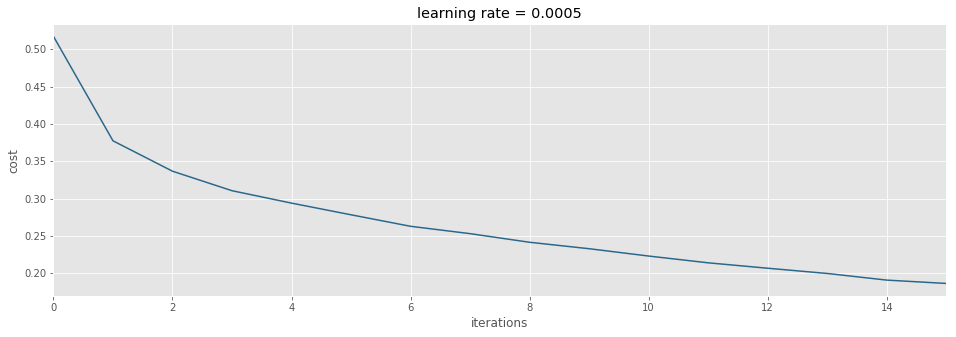

Parameters have been trained!
Train Accuracy: 0.9358
Test Accuracy: 0.8893


In [5]:
# generate neural network
train = fashion_mnist.train
test = fashion_mnist.test

model(train, test, labels, learning_rate=0.0005)

In [6]:
# load svm data
train = load_mnist('../data/')
test = load_mnist('../data/', kind='t10k')

# shapes of training set
print('Training set (images) shape: {shape}'.format(shape=train[0].shape))
print('Training set (labels) shape: {shape}'.format(shape=train[1].shape))

# shapes of test set
print('Test set (images) shape: {shape}'.format(shape=test[0].shape))
print('Test set (labels) shape: {shape}'.format(shape=test[1].shape))

Training set (images) shape: (60000, 784)
Training set (labels) shape: (60000,)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000,)


In [7]:
# train + predict with svm
model = fit(train)
prediction = predict(model, test)


SVM Trained Classifier Accuracy: 0.8723
Predicted Values: [9 2 1 ..., 8 1 5]
Accuracy of Classifier on Validation Images: 0.8723
Confusion Matrix: [[834   5  21  20   4   2 104   0   9   1]
 [  4 981   1   8   3   0   3   0   0   0]
 [ 39   6 819  12  66   0  54   0   4   0]
 [ 41  16  25 846  29   0  39   0   4   0]
 [  2   1 121  39 769   0  63   0   5   0]
 [  0   0   0   1   0 960   0  22   3  14]
 [147   4  91  26  72   0 650   0  10   0]
 [  0   0   0   0   0  27   0 944   0  29]
 [  6   0  10   4   2   3  11   2 962   0]
 [  0   1   0   0   0  12   1  28   0 958]]



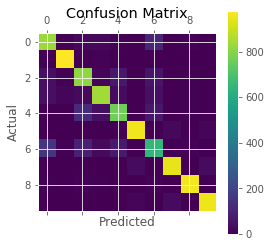

In [ ]:
# determine svm accuracy
predicted_labels = accuracy(model, test, prediction)

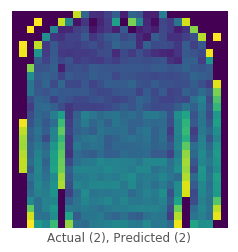

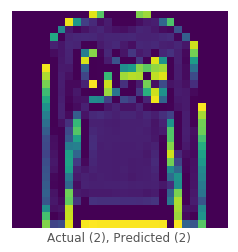

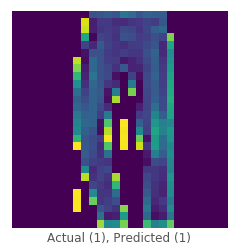

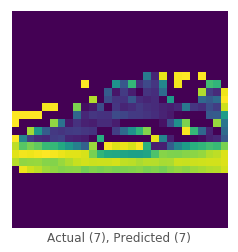

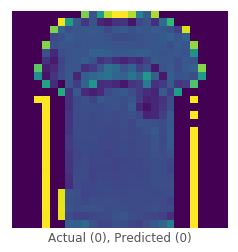

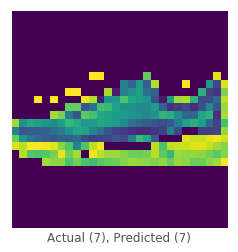

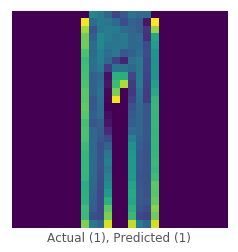

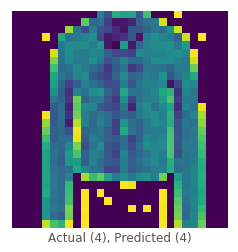

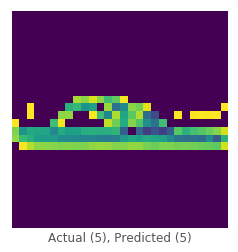

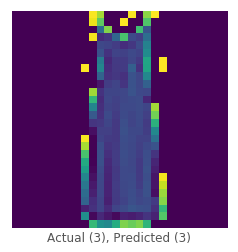

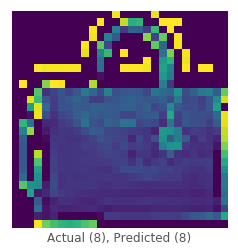

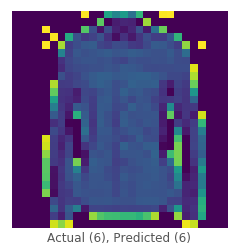

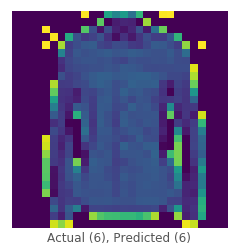

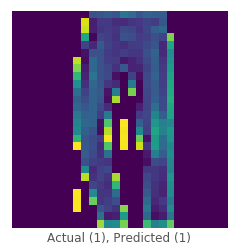

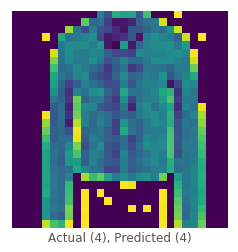

In [75]:
# visualize svm
viz_svm(test, labels)